# Data Science Bootcamp Capstone Project

## Problem Identification

Apple Inc. is a global technology firm based in the United States that specializes in consumer goods, software, and online services. Apple is the world's most valuable firm and the leading information technology company by revenue since January 2021. (https://en.wikipedia.org/wiki/Apple_Inc.)

Apple is the fourth-largest PC vendor by unit sales, as well as the fourth-largest smartphone maker, as of 2021. Along with Amazon, Alphabet (Google), Meta (Facebook), and Microsoft, it is one of the Big Five American information technology corporations.
 
Furthermore, with the recent technoloical boom, many investors have been keeping their eye on apple stocks, hoping to buy the stocks at the optimal time, to make a profit out of it

# Importing Packages and Data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('apple_stock_price.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


# Data Cleaning 

In [5]:
df.dtypes

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

## To rename columns

In [6]:
df = df.rename(columns={' Close/Last':'Close', ' Volume':'Volume', ' Open': 'Open', ' High':'High', ' Low':'Low'})
df

,Date,Close,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


## To check for missing datas

In [7]:
df.isnull()
df.isnull().sum()

,Date,Close,Volume,Open,High,Low
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2513,False,False,False,False,False,False
2514,False,False,False,False,False,False
2515,False,False,False,False,False,False
2516,False,False,False,False,False,False


Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [8]:
df.isna().any()

Date      False
Close     False
Volume    False
Open      False
High      False
Low       False
dtype: bool

- no missing data

## To change object type and remove symbols

In [9]:
col_to_check = list(df.columns)
col_to_check

col_to_remove = [0, 2]
for x in sorted(col_to_remove, reverse = True):
    del col_to_check[x]
    
col_to_check

['Date', 'Close', 'Volume', 'Open', 'High', 'Low']

['Close', 'Open', 'High', 'Low']

In [10]:
# to change all object type to str

df[col_to_check] = df[col_to_check].astype('str') 
df.dtypes

Date      object
Close     object
Volume     int64
Open      object
High      object
Low       object
dtype: object

In [11]:
df['Close'] = df['Close'].str.replace('$', '').astype('float')
df['Open'] = df['Open'].str.replace('$', '').astype('float')
df['High'] = df['High'].str.replace('$', '').astype('float')
df['Low'] = df['Low'].str.replace('$', '').astype('float')
df.head()
df.dtypes

/var/folders/fl/slc798r55sq_x96fvbs6fx4h0000gn/T/ipykernel_3880/4028286939.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Close'] = df['Close'].str.replace('$', '').astype('float')
/var/folders/fl/slc798r55sq_x96fvbs6fx4h0000gn/T/ipykernel_3880/4028286939.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Open'] = df['Open'].str.replace('$', '').astype('float')
/var/folders/fl/slc798r55sq_x96fvbs6fx4h0000gn/T/ipykernel_3880/4028286939.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['High'] = df['High

,Date,Close,Volume,Open,High,Low
0,02/28/2020,273.36,106721200,257.26,278.41,256.37
1,02/27/2020,273.52,80151380,281.10,286.00,272.96
2,02/26/2020,292.65,49678430,286.53,297.88,286.50
3,02/25/2020,288.08,57668360,300.95,302.53,286.13
4,02/24/2020,298.18,55548830,297.26,304.18,289.23


Date       object
Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

## To check for duplicates

In [12]:
df.duplicated() 
df.duplicated().sum() 

0       False
1       False
2       False
3       False
4       False
        ...  
2513    False
2514    False
2515    False
2516    False
2517    False
Length: 2518, dtype: bool

0

- no duplication

# EDA

In [13]:
plt.style.use('_classic_test_patch')

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by="Date")
df

df = df.set_index('Date')
df

,Date,Close,Volume,Open,High,Low
2517,2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614
...,...,...,...,...,...,...
4,2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300
3,2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300
2,2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000
1,2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600


,Close,Volume,Open,High,Low
Date,,,,,
2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500
2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771
2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057
2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043
2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614
...,...,...,...,...,...
2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300
2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300
2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000


## General Graph

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'General Trend')

Text(0.5, 0, 'Time')

Text(0, 0.5, "['Close', 'Volume', 'Open', 'High', 'Low']")

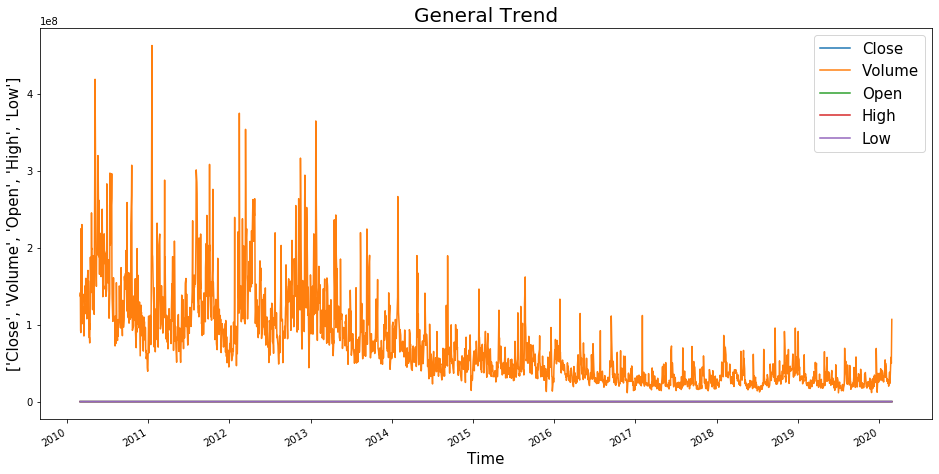

In [15]:
df.plot(figsize=(16,8))

# To add title
plt.title('General Trend', size=20)

# To add axis
plt.xlabel('Time', size=15)
plt.ylabel(f"{list(df.columns)}", size=15)

# To adjust legend
plt.legend(fontsize=15)

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Trend of Stocks Price')

Text(0.5, 0, 'Time')

Text(0, 0.5, "['Close', 'Open', 'High', 'Low']")

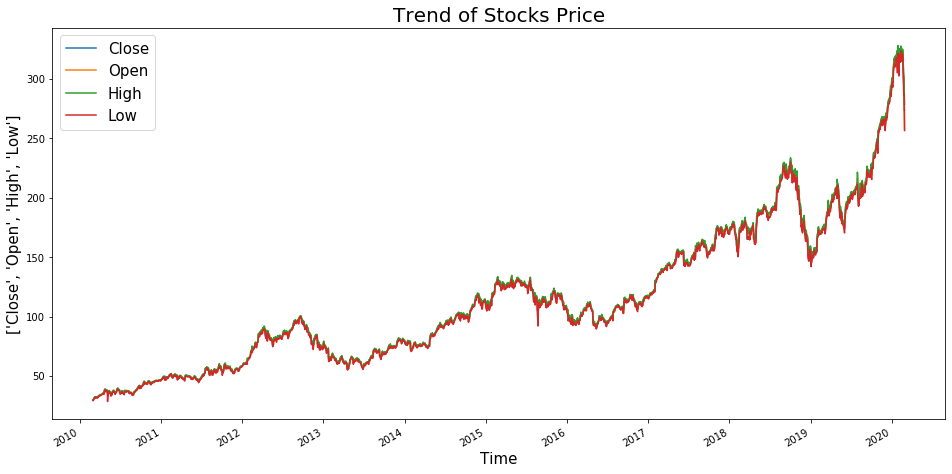

In [16]:
col_to_show = ['Close', 'Open', 'High', 'Low']
df[col_to_show].plot(figsize=(16,8))

# To add title
plt.title('Trend of Stocks Price', size=20)

# To add axis
plt.xlabel('Time', size=15)
plt.ylabel(f"{col_to_show}", size=15)

# To adjust legend
plt.legend(fontsize=15)

## Simple Moving Average 

<AxesSubplot:xlabel='Date'>

,Close,Volume,Open,High,Low,SMA
Date,,,,,,
2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500,NaN
2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,NaN
2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,NaN
2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,NaN
2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,NaN
...,...,...,...,...,...,...
2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300,304.62818
2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300,305.27098
2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000,305.64598


<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Prices with moving average')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Open')

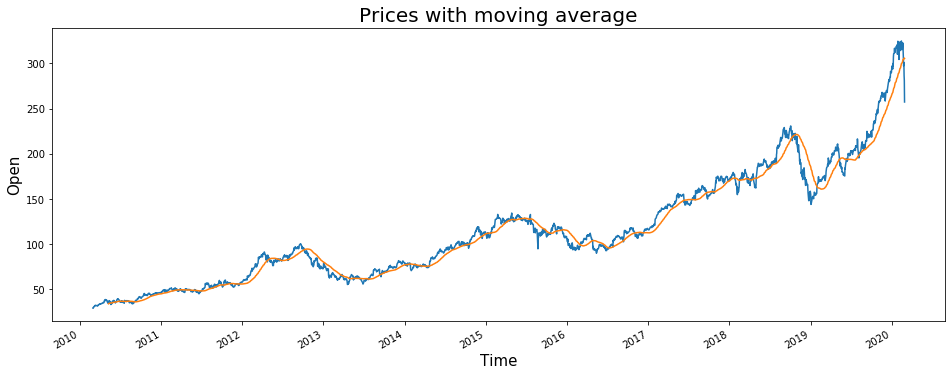

In [17]:
df['Open'].plot(figsize=(16, 6))
df['SMA'] = df.rolling(50).mean()['Open']
df
df['SMA'].plot()

plt.title('Prices with moving average', size=20)
plt.xlabel('Time', size=15)
plt.ylabel('Open', size=15)

# Linear Regression Model

## Removing NaN values

In [18]:
median = df['SMA'].median()
df['SMA'] = df['SMA'].fillna(median)
df

,Close,Volume,Open,High,Low,SMA
Date,,,,,,
2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500,101.78700
2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,101.78700
2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,101.78700
2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,101.78700
2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,101.78700
...,...,...,...,...,...,...
2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300,304.62818
2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300,305.27098
2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000,305.64598


## Regression model

In [19]:
# To select X
X = df[['Open']]
X

,Open
Date,
2010-03-01,29.3928
2010-03-02,29.9900
2010-03-03,29.8486
2010-03-04,29.8971
2010-03-05,30.7057
...,...
2020-02-24,297.2600
2020-02-25,300.9500
2020-02-26,286.5300


In [20]:
# To select Y
y = df[['SMA']]
y

,SMA
Date,
2010-03-01,101.78700
2010-03-02,101.78700
2010-03-03,101.78700
2010-03-04,101.78700
2010-03-05,101.78700
...,...
2020-02-24,304.62818
2020-02-25,305.27098
2020-02-26,305.64598


In [21]:
from sklearn.linear_model import LinearRegression

Text(0.5, 0, 'Open')

Text(0, 0.5, 'SMA')

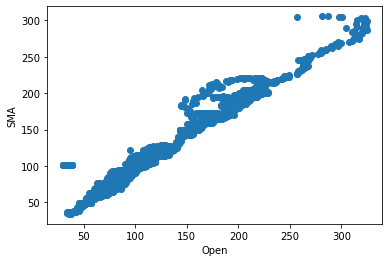

In [22]:
plt.scatter(X,y)
plt.xlabel('Open')
plt.ylabel('SMA')

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()
lm.fit(X, y)
predictions = lm.predict(X)
predictions

LinearRegression()

array([[ 35.69705065],
       [ 36.2406883 ],
       [ 36.11197035],
       ...,
       [269.7718405 ],
       [264.82885244],
       [243.12704115]])

Text(0.5, 0, 'Open')

Text(0, 0.5, 'SMA')

array([[ 29.3928],
       [324.74  ]])

array([[ 35.69705065],
       [304.55481908]])

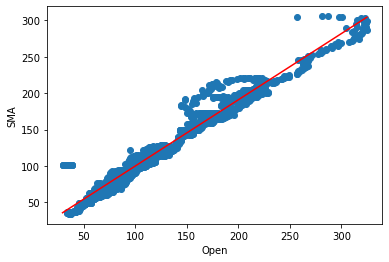

In [25]:
plt.scatter(X,y)
plt.xlabel('Open')
plt.ylabel('SMA')

x = np.array([X.min(),X.max()])
x
y_pred = x * lm.coef_ + lm.intercept_
y_pred

plt.plot(x,y_pred,c='r')

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Predicted Open Price')

Text(0, 0.5, 'Actual Open Price')

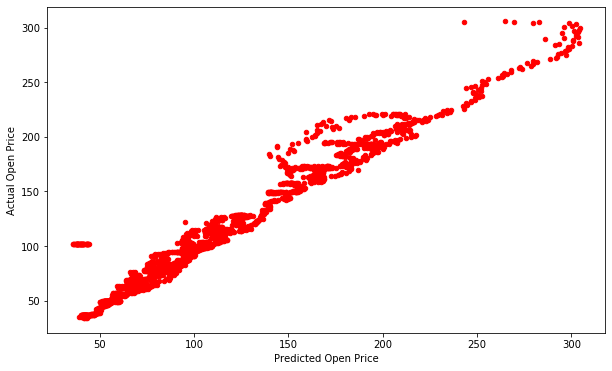

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=20, c='r')
plt.xlabel("Predicted Open Price")
plt.ylabel("Actual Open Price")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y, predictions)
adjusted_r2 = 1 - (len(y)-1)/(len(y)-len(X.columns)-1)*(1 - r2)

print("MSE:", f'{mean_squared_error(y, predictions)}')
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Coefficients: ",lm.coef_)
print("Intercept: ",lm.intercept_)

MSE: 150.45669416903903
R-squared: 0.9527916539720591
Adjusted R-squared: 0.9527728907184709
Coefficients:  [[0.91031088]]
Intercept:  [8.94046512]


# Evaluation and conclusion

- R-squared:
    - R-squared ranges from 0 to 1
    - Generally, the higher the r-squared value, the closer the fit for the model
    - Since the R-squared value is relative high at 0.95277, it indicated that about 95% of the data fit the model 

- Coefficient of correlation:
    - Since coefficient of correlation value is close to 1, at 0.91031088, the model is relatively accurate  

These data can be combined with stock prices of the other companies to see if there are any relationship, such as whether changes in other companies stock price will affect the stock price of apple. This way, a better prediction model for stock prices can be produced.

However, stock price are affected by earnings, economy, expectations and emotion. Prediction based on previous stock prices may not be accurate when there is a sudden changes in any of those factors that machine learning cannot pick up on. 

Predicting stock price based on linear regression has its limitations, such as there is a lot of variability in the actual data but a standard increase in the forecasted values. 

In future, Long Short Term Memory (LSTM) modelling can be used. LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series Thus, this more advanced and complex deep learning model is able to better predict future stock prices.

https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/